<function matplotlib.pyplot.show(close=None, block=None)>

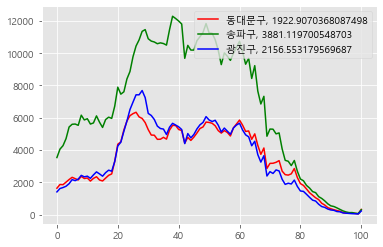

In [21]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('서울.csv')
data = csv.reader(f)

hwayang = []
dif = {}
sum = 0
total = 0
most = []
least = []
dev_most = 0
dev_least = 0
avg_most = 0
avg_least = 0

for row in data:
    if(row[0] == "서울특별시 광진구 (1121500000)"):
        for i in range(3,104):
            num = row[i].split(",")
            index = len(num)
            for s in num:
                if(s != ''):
                    sum += int(s)*(1000**(index-1))
                    index-=1
                else:
                    sum = row[i]
            hwayang.append(int(sum))
            sum = 0

f = open('서울.csv')
data = csv.reader(f)
next(data)
next(data)
for row in data:        
    if(row[0] != "서울특별시 광진구 (1121500000)" and row[0] != ''):
        for i in range(3,104):
                num = row[i].split(",")
                index = len(num)
                for s in num:
                    if(s != ''):
                        sum += int(s)*(1000**(index-1))
                        index-=1
                    else:
                        sum = row[i]
                total += (int(sum)-hwayang[i-4])**2
                sum = 0
        dif[total] = row[0]
        total = 0
        
key = sorted(dif)

f = open('서울.csv')
data = csv.reader(f)
next(data)
for row in data:
    if(row[0] == dif[key[0]]):
        for i in range(3,104):
            num = row[i].split(",")
            index = len(num)
            for s in num:
                if(s != ''):
                    sum += int(s)*(1000**(index-1))
                    index-=1
                else:
                    sum = row[i]
            most.append(int(sum))
            sum = 0
    elif(row[0] == dif[key[-1]]):
        for i in range(3,104):
            num = row[i].split(",")
            index = len(num)
            for s in num:
                if(s != ''):
                    sum += int(s)*(1000**(index-1))
                    index-=1
                else:
                    sum = row[i]
            least.append(int(sum))
            sum = 0

plt.rc('font', family = 'malgun gothic')
plt.style.use('ggplot')
plt.plot(most, label = dif[key[0]].split(" ")[1]+", "+str(np.std(most)), color = 'r')
plt.plot(least, label = dif[key[-1]].split(" ")[1]+", "+str(np.std(least)), color = 'g')
plt.plot(hwayang, label = '광진구'+", "+str(np.std(hwayang)), color = 'b')
plt.legend(loc = 1)
plt.show